# Time series analysis in Python
https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python

## Introduction

In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [2]:
# Names of the columns
features = ["date", "time", "value", "detection"]

train = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/Barreiro/train_barreiro_1.csv', sep = ';', names = features)

test = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/Barreiro/test_barreiro_1.csv', sep = ';', names = features)

## Train

In [3]:
train

,date,time,value,detection
0,03/05/2018,00:07:30,13.026578,0
1,03/05/2018,00:22:30,10.898906,0
2,03/05/2018,00:37:30,11.048772,0
3,03/05/2018,00:52:30,10.641706,0
4,03/05/2018,01:07:30,10.452578,0
...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0
476,09/05/2018,23:07:30,19.707922,0
477,09/05/2018,23:22:30,19.546844,0
478,09/05/2018,23:37:30,21.068406,0


In [4]:
# Start time and end time
train['date'].min(), train['date'].max()

('03/05/2018', '09/05/2018')

In [5]:
# Join columns date and time
train['datetime'] = train['date'] + ' ' + train['time']
train

,date,time,value,detection,datetime
0,03/05/2018,00:07:30,13.026578,0,03/05/2018 00:07:30
1,03/05/2018,00:22:30,10.898906,0,03/05/2018 00:22:30
2,03/05/2018,00:37:30,11.048772,0,03/05/2018 00:37:30
3,03/05/2018,00:52:30,10.641706,0,03/05/2018 00:52:30
4,03/05/2018,01:07:30,10.452578,0,03/05/2018 01:07:30
...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,09/05/2018 22:52:30
476,09/05/2018,23:07:30,19.707922,0,09/05/2018 23:07:30
477,09/05/2018,23:22:30,19.546844,0,09/05/2018 23:22:30
478,09/05/2018,23:37:30,21.068406,0,09/05/2018 23:37:30


In [6]:
# The strftime() method returns a string representing date and time using date, time or datetime object
train['datetime'] = pd.to_datetime(train['datetime'], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S').astype(str)
# Visualize data
train

,date,time,value,detection,datetime
0,03/05/2018,00:07:30,13.026578,0,2018-05-03 00:07:30
1,03/05/2018,00:22:30,10.898906,0,2018-05-03 00:22:30
2,03/05/2018,00:37:30,11.048772,0,2018-05-03 00:37:30
3,03/05/2018,00:52:30,10.641706,0,2018-05-03 00:52:30
4,03/05/2018,01:07:30,10.452578,0,2018-05-03 01:07:30
...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,2018-05-09 22:52:30
476,09/05/2018,23:07:30,19.707922,0,2018-05-09 23:07:30
477,09/05/2018,23:22:30,19.546844,0,2018-05-09 23:22:30
478,09/05/2018,23:37:30,21.068406,0,2018-05-09 23:37:30


In [7]:
# .info() function is used to get a concise summary of the DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
 4   datetime   480 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.9+ KB


In [8]:
# Immutable ndarray-like of datetime64 data
# Represented internally as int64, and which can be boxed to Timestamp objects that are subclasses of datetime and carry metadata.
train['datetime'] = pd.DatetimeIndex(data=train['datetime'], dtype='datetime64[ns]', name='datetime', freq=None)

In [9]:
# .info() function is used to get a concise summary of the DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       480 non-null    object        
 1   time       480 non-null    object        
 2   value      480 non-null    float64       
 3   detection  480 non-null    int64         
 4   datetime   480 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 18.9+ KB


In [10]:
# Group DataFrame using a mapper or by a Series of columns
df = train.groupby('datetime')['value'].sum().reset_index()
# Visualize data
df

,datetime,value
0,2018-05-03 00:07:30,13.026578
1,2018-05-03 00:22:30,10.898906
2,2018-05-03 00:37:30,11.048772
3,2018-05-03 00:52:30,10.641706
4,2018-05-03 01:07:30,10.452578
...,...,...
475,2018-05-09 22:52:30,22.357783
476,2018-05-09 23:07:30,19.707922
477,2018-05-09 23:22:30,19.546844
478,2018-05-09 23:37:30,21.068406


In [11]:
# Set the DataFrame index using existing columns
df = df.set_index('datetime')
# The index (row labels) of the DataFrame
df.index

DatetimeIndex(['2018-05-03 00:07:30', '2018-05-03 00:22:30',
               '2018-05-03 00:37:30', '2018-05-03 00:52:30',
               '2018-05-03 01:07:30', '2018-05-03 01:22:30',
               '2018-05-03 01:37:30', '2018-05-03 01:52:30',
               '2018-05-03 02:07:30', '2018-05-03 02:22:30',
               ...
               '2018-05-09 21:37:30', '2018-05-09 21:52:30',
               '2018-05-09 22:07:30', '2018-05-09 22:22:30',
               '2018-05-09 22:37:30', '2018-05-09 22:52:30',
               '2018-05-09 23:07:30', '2018-05-09 23:22:30',
               '2018-05-09 23:37:30', '2018-05-09 23:52:30'],
              dtype='datetime64[ns]', name='datetime', length=480, freq=None)

In [12]:
# Visualize data
df

,value
datetime,
2018-05-03 00:07:30,13.026578
2018-05-03 00:22:30,10.898906
2018-05-03 00:37:30,11.048772
2018-05-03 00:52:30,10.641706
2018-05-03 01:07:30,10.452578
...,...
2018-05-09 22:52:30,22.357783
2018-05-09 23:07:30,19.707922
2018-05-09 23:22:30,19.546844


Text(0, 0.5, 'Flow Rate (m3-s)')

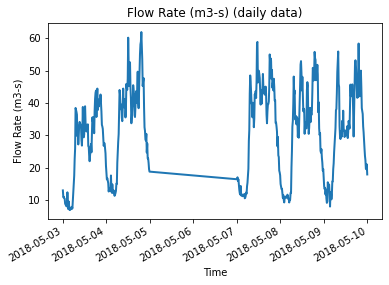

In [13]:
# Change line width of lines in matplotlib
df['value'].plot(linewidth=2).set_title('Flow Rate (m3-s) (daily data)')
plt.xlabel('Time')
plt.ylabel('Flow Rate (m3-s)')

### Forecast quality metrics
Before we begin forecasting, let's understand how to measure the quality of our predictions and take a look at the most commonly used metrics.

In [14]:
import sklearn.metrics

In [15]:
sklearn.metrics.r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [16]:
sklearn.metrics.mean_absolute_error

<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [17]:
sklearn.metrics.median_absolute_error

<function sklearn.metrics._regression.median_absolute_error(y_true, y_pred, *, multioutput='uniform_average')>

In [18]:
sklearn.metrics.mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>

In [19]:
sklearn.metrics.mean_squared_log_error

<function sklearn.metrics._regression.mean_squared_log_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [20]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Move, smoothe, evaluate

In [21]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(df, 24) # prediction for the last observed day (past 24 hours)

35.96867743041667

In [22]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

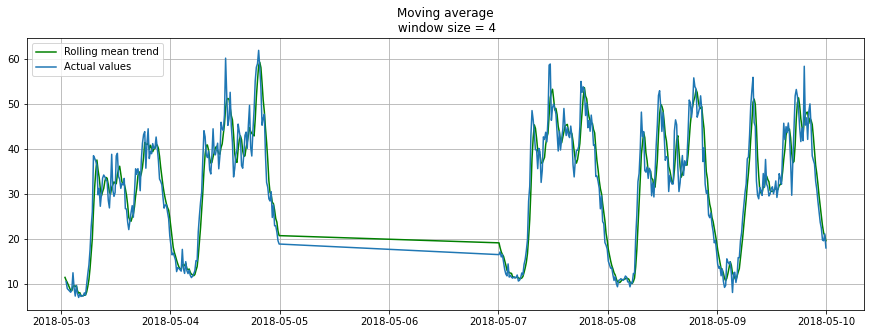

In [54]:
plotMovingAverage(df, 4) 

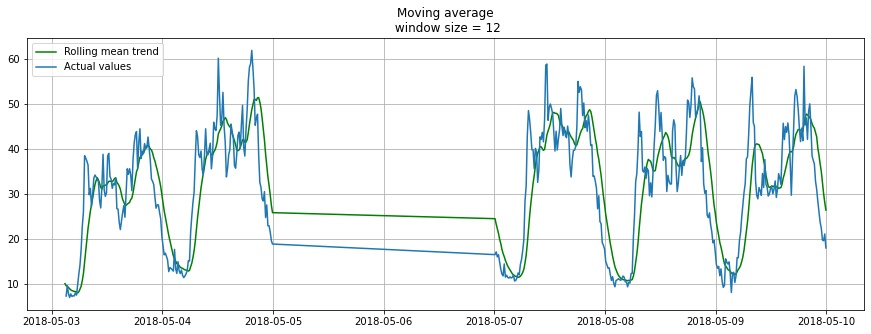

In [55]:
plotMovingAverage(df, 12) 

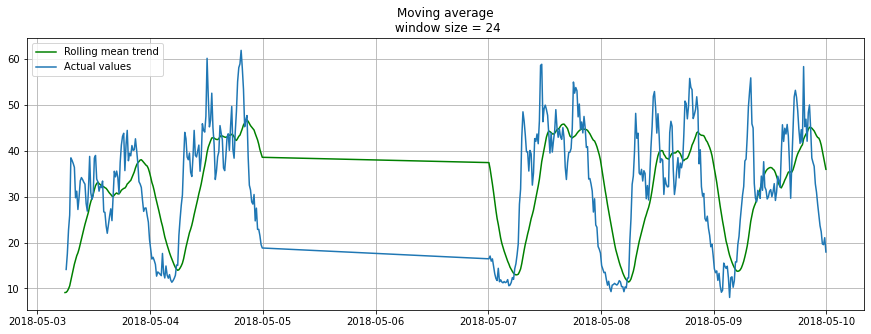

In [57]:
plotMovingAverage(df, 24)

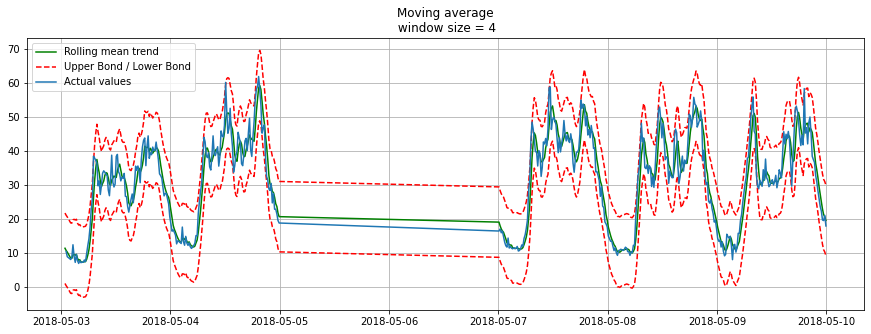

In [58]:
plotMovingAverage(df, 4, plot_intervals=True)

In [23]:
ads_anomaly = df.copy()
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

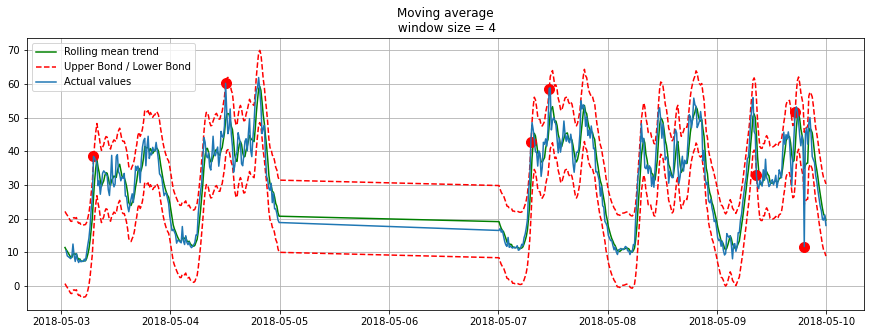

In [60]:
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)

## Test

In [24]:
test

,date,time,value,detection
0,10/05/2018,00:07:30,15.713694,0
1,10/05/2018,00:22:30,14.460300,0
2,10/05/2018,00:37:30,14.975789,0
3,10/05/2018,00:52:30,14.658967,0
4,10/05/2018,01:07:30,11.786478,0
...,...,...,...,...
91,10/05/2018,22:52:30,23.881589,0
92,10/05/2018,23:07:30,21.902367,0
93,10/05/2018,23:22:30,23.582700,0
94,10/05/2018,23:37:30,23.657244,0


In [25]:
# Start time and end time
train['date'].min(), train['date'].max()

('03/05/2018', '09/05/2018')

In [26]:
# Join columns date and time
test['datetime'] = test['date'] + ' ' + test['time']
test

,date,time,value,detection,datetime
0,10/05/2018,00:07:30,15.713694,0,10/05/2018 00:07:30
1,10/05/2018,00:22:30,14.460300,0,10/05/2018 00:22:30
2,10/05/2018,00:37:30,14.975789,0,10/05/2018 00:37:30
3,10/05/2018,00:52:30,14.658967,0,10/05/2018 00:52:30
4,10/05/2018,01:07:30,11.786478,0,10/05/2018 01:07:30
...,...,...,...,...,...
91,10/05/2018,22:52:30,23.881589,0,10/05/2018 22:52:30
92,10/05/2018,23:07:30,21.902367,0,10/05/2018 23:07:30
93,10/05/2018,23:22:30,23.582700,0,10/05/2018 23:22:30
94,10/05/2018,23:37:30,23.657244,0,10/05/2018 23:37:30


In [27]:
# The strftime() method returns a string representing date and time using date, time or datetime object
test['datetime'] = pd.to_datetime(test['datetime'], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S').astype(str)
# Visualize data
test

,date,time,value,detection,datetime
0,10/05/2018,00:07:30,15.713694,0,2018-05-10 00:07:30
1,10/05/2018,00:22:30,14.460300,0,2018-05-10 00:22:30
2,10/05/2018,00:37:30,14.975789,0,2018-05-10 00:37:30
3,10/05/2018,00:52:30,14.658967,0,2018-05-10 00:52:30
4,10/05/2018,01:07:30,11.786478,0,2018-05-10 01:07:30
...,...,...,...,...,...
91,10/05/2018,22:52:30,23.881589,0,2018-05-10 22:52:30
92,10/05/2018,23:07:30,21.902367,0,2018-05-10 23:07:30
93,10/05/2018,23:22:30,23.582700,0,2018-05-10 23:22:30
94,10/05/2018,23:37:30,23.657244,0,2018-05-10 23:37:30


In [28]:
# Immutable ndarray-like of datetime64 data
# Represented internally as int64, and which can be boxed to Timestamp objects that are subclasses of datetime and carry metadata.
test['datetime'] = pd.DatetimeIndex(data=test['datetime'], dtype='datetime64[ns]', name='datetime', freq=None)

In [29]:
# Group DataFrame using a mapper or by a Series of columns
dfT = test.groupby('datetime')['value'].sum().reset_index()
# Visualize data
dfT

,datetime,value
0,2018-05-10 00:07:30,15.713694
1,2018-05-10 00:22:30,14.460300
2,2018-05-10 00:37:30,14.975789
3,2018-05-10 00:52:30,14.658967
4,2018-05-10 01:07:30,11.786478
...,...,...
91,2018-05-10 22:52:30,23.881589
92,2018-05-10 23:07:30,21.902367
93,2018-05-10 23:22:30,23.582700
94,2018-05-10 23:37:30,23.657244


In [30]:
# Set the DataFrame index using existing columns
dfT = dfT.set_index('datetime')
# The index (row labels) of the DataFrame
dfT.index

DatetimeIndex(['2018-05-10 00:07:30', '2018-05-10 00:22:30',
               '2018-05-10 00:37:30', '2018-05-10 00:52:30',
               '2018-05-10 01:07:30', '2018-05-10 01:22:30',
               '2018-05-10 01:37:30', '2018-05-10 01:52:30',
               '2018-05-10 02:07:30', '2018-05-10 02:22:30',
               '2018-05-10 02:37:30', '2018-05-10 02:52:30',
               '2018-05-10 03:07:30', '2018-05-10 03:22:30',
               '2018-05-10 03:37:30', '2018-05-10 03:52:30',
               '2018-05-10 04:07:30', '2018-05-10 04:22:30',
               '2018-05-10 04:37:30', '2018-05-10 04:52:30',
               '2018-05-10 05:07:30', '2018-05-10 05:22:30',
               '2018-05-10 05:37:30', '2018-05-10 05:52:30',
               '2018-05-10 06:07:30', '2018-05-10 06:22:30',
               '2018-05-10 06:37:30', '2018-05-10 06:52:30',
               '2018-05-10 07:07:30', '2018-05-10 07:22:30',
               '2018-05-10 07:37:30', '2018-05-10 07:52:30',
               '2018-05-

In [31]:
# Visualize data
dfT

,value
datetime,
2018-05-10 00:07:30,15.713694
2018-05-10 00:22:30,14.460300
2018-05-10 00:37:30,14.975789
2018-05-10 00:52:30,14.658967
2018-05-10 01:07:30,11.786478
...,...
2018-05-10 22:52:30,23.881589
2018-05-10 23:07:30,21.902367
2018-05-10 23:22:30,23.582700


Text(0, 0.5, 'Flow Rate (m3-s)')

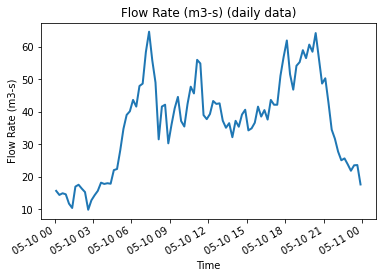

In [69]:
# Change line width of lines in matplotlib
dfT['value'].plot(linewidth=2).set_title('Flow Rate (m3-s) (daily data)')
plt.xlabel('Time')
plt.ylabel('Flow Rate (m3-s)')

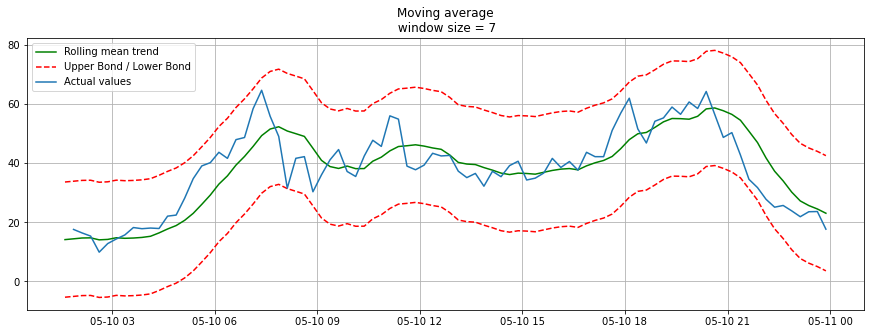

In [70]:
plotMovingAverage(dfT, 7, plot_intervals=True, plot_anomalies=True) # weekly smoothing

In [32]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [33]:
weighted_average(df, [0.6, 0.3, 0.1])

19.047049444000002

## Exponential smoothing

In [34]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [35]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

In [36]:
import ads

ModuleNotFoundError: No module named 'ads'

In [37]:
plotExponentialSmoothing(df.Ads, [0.3, 0.05])

AttributeError: 'DataFrame' object has no attribute 'Ads'

In [38]:
plotExponentialSmoothing(dfT.GEMS_GEMS_SPENT, [0.3, 0.05])

AttributeError: 'DataFrame' object has no attribute 'GEMS_GEMS_SPENT'

## Double exponential smoothing

In [39]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

In [41]:
plotDoubleExponentialSmoothing(df.Ads, alphas=[0.9, 0.02], betas=[0.9, 0.02])

AttributeError: 'DataFrame' object has no attribute 'Ads'

In [42]:
plotDoubleExponentialSmoothing(dfT.GEMS_GEMS_SPENT, alphas=[0.9, 0.02], betas=[0.9, 0.02])

AttributeError: 'DataFrame' object has no attribute 'GEMS_GEMS_SPENT'

## Triple exponential smoothing a.k.a. Holt-Winters

In [43]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

## Time series cross validation

In [57]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [56]:
%%time
data = df.Ads[:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [58]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

In [59]:
plotHoltWinters(df)

NameError: name 'model' is not defined

<Figure size 1440x720 with 0 Axes>

In [60]:
plotHoltWinters(df, plot_intervals=True, plot_anomalies=True)

NameError: name 'model' is not defined

<Figure size 1440x720 with 0 Axes>

In [61]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

NameError: name 'model' is not defined

<Figure size 1800x360 with 0 Axes>

In [63]:
%%time
data = dfT.GEMS_GEMS_SPENT[:-50] 
slen = 30 # 30-day seasonality

x = [0, 0, 0] 

opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_absolute_percentage_error, slen), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

model = HoltWinters(data, slen = slen, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 100, scaling_factor = 3)
model.triple_exponential_smoothing()

AttributeError: 'DataFrame' object has no attribute 'GEMS_GEMS_SPENT'

In [64]:
plotHoltWinters(dfT.GEMS_GEMS_SPENT)

AttributeError: 'DataFrame' object has no attribute 'GEMS_GEMS_SPENT'

In [66]:
plotHoltWinters(currency.GEMS_GEMS_SPENT, plot_intervals=True, plot_anomalies=True)

NameError: name 'currency' is not defined

In [65]:
plt.figure(figsize=(20, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

NameError: name 'model' is not defined

<Figure size 1440x360 with 0 Axes>

## Econometric approach

### Stationarity

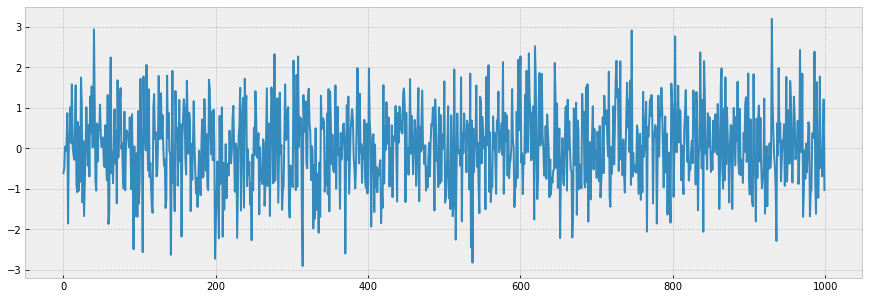

In [67]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

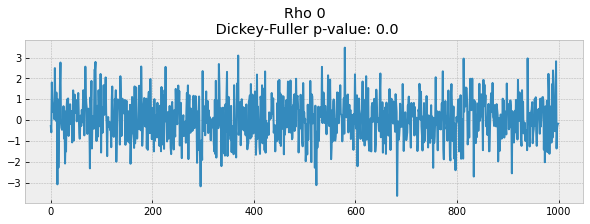

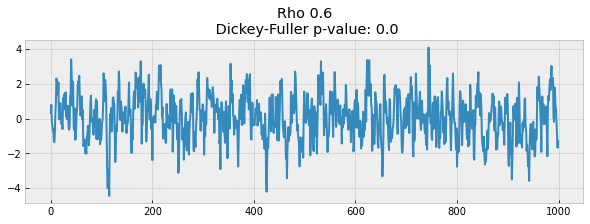

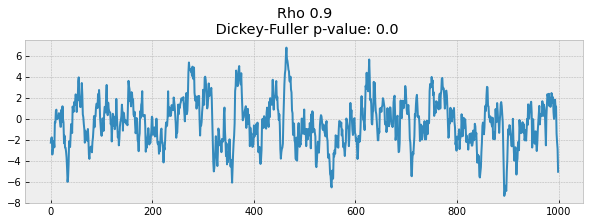

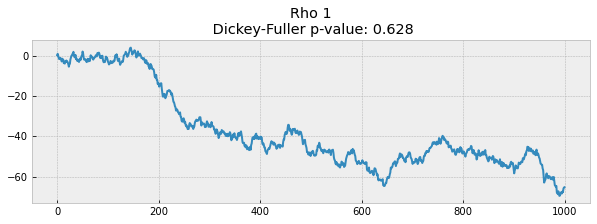

In [68]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

## Getting rid of non-stationarity and building SARIMA

In [69]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [70]:
tsplot(df.Ads, lags=60)

AttributeError: 'DataFrame' object has no attribute 'Ads'

In [ ]:
ads_diff = ads.Ads - ads.Ads.shift(24)
tsplot(ads_diff[24:], lags=60)

In [ ]:
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)

### ARIMA-family Crash-Course

In [ ]:
tsplot(ads_diff[24+1:], lags=60)

In [71]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [72]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [73]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [74]:
result_table.head()

NameError: name 'result_table' is not defined

In [75]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

NameError: name 'result_table' is not defined

In [ ]:
tsplot(best_model.resid[24+1:], lags=60)

In [76]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

In [78]:
plotSARIMA(df, best_model, 50)

NameError: name 'best_model' is not defined

## Linear (and not quite) models on time series

XXXX

## Feature exctraction

### Lags of time series

In [ ]:
# Creating a copy of the initial datagrame to make various transformations 
# data = pd.DataFrame(ads.Ads.copy())
# data.columns = ["y"]

In [80]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    df["lag_{}".format(i)] = df.value.shift(i)

In [81]:
# take a look at the new dataframe 
df.tail(7)

,value,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
datetime,,,,,,,,,,,,,,,,,,,,
2018-05-09 22:22:30,25.941972,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339,53.182956,51.746803,44.381839,37.463733,29.666011
2018-05-09 22:37:30,23.667603,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339,53.182956,51.746803,44.381839,37.463733
2018-05-09 22:52:30,22.357783,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339,53.182956,51.746803,44.381839
2018-05-09 23:07:30,19.707922,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339,53.182956,51.746803
2018-05-09 23:22:30,19.546844,30.982689,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339,53.182956
2018-05-09 23:37:30,21.068406,28.309133,30.982689,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339
2018-05-09 23:52:30,17.953072,25.941972,28.309133,30.982689,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [83]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [86]:
y = df.dropna().value
X = df.dropna().drop(['value'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [87]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

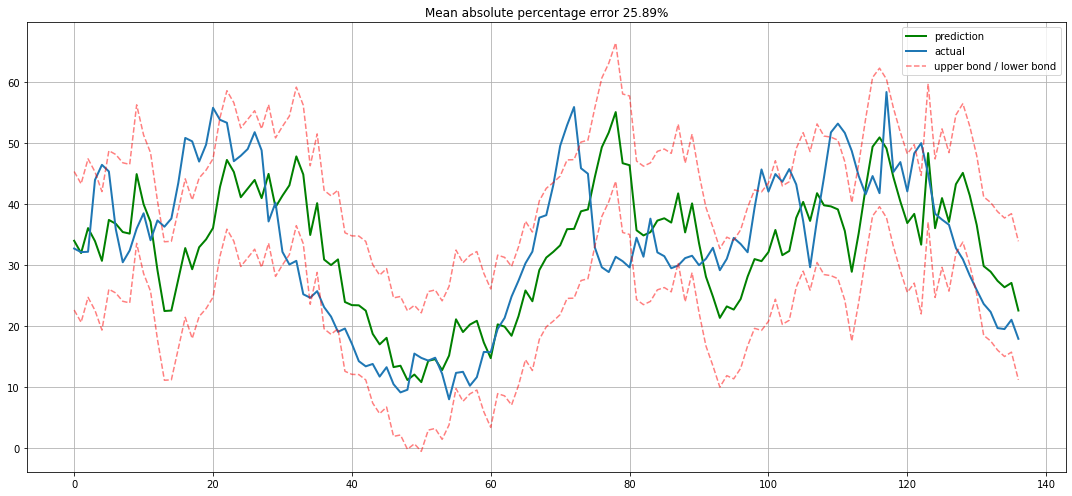

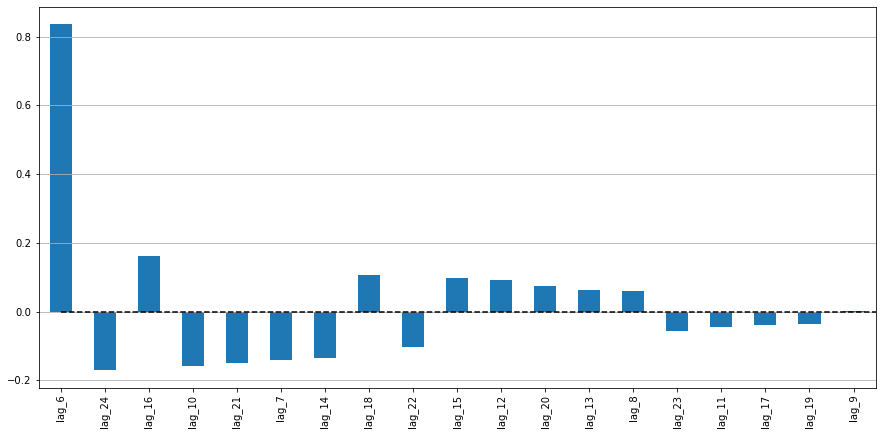

In [89]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [90]:
df.index = pd.to_datetime(df.index)
df["hour"] = df.index.hour
df["weekday"] = df.index.weekday
df['is_weekend'] = df.weekday.isin([5,6])*1
df.tail()

,value,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,hour,weekday,is_weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2018-05-09 22:52:30,22.357783,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,45.267233,...,41.606544,44.602767,48.713311,51.659339,53.182956,51.746803,44.381839,22,2,0
2018-05-09 23:07:30,19.707922,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,46.882167,...,44.595922,41.606544,44.602767,48.713311,51.659339,53.182956,51.746803,23,2,0
2018-05-09 23:22:30,19.546844,30.982689,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,42.084417,...,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339,53.182956,23,2,0
2018-05-09 23:37:30,21.068406,28.309133,30.982689,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,48.309733,...,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,51.659339,23,2,0
2018-05-09 23:52:30,17.953072,25.941972,28.309133,30.982689,32.801550,36.618228,37.464811,38.432406,44.922167,49.984489,...,45.267233,58.348900,41.791500,44.595922,41.606544,44.602767,48.713311,23,2,0


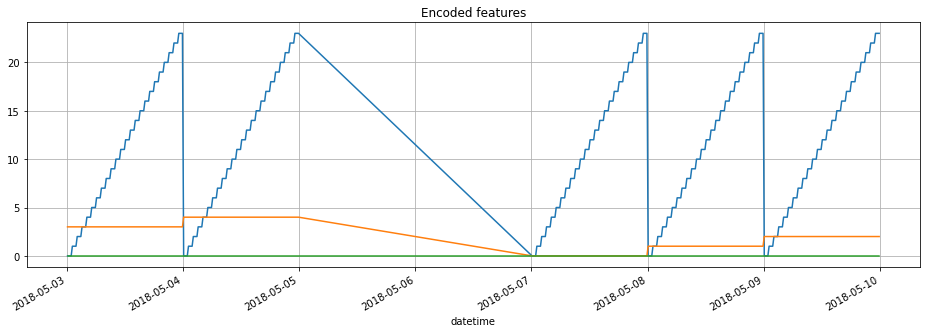

In [91]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
df.hour.plot()
df.weekday.plot()
df.is_weekend.plot()
plt.grid(True);

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

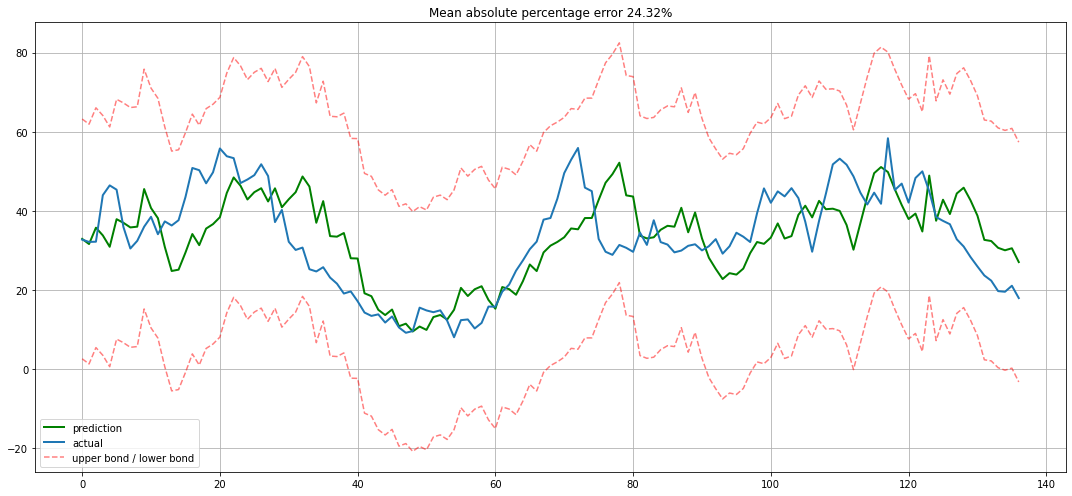

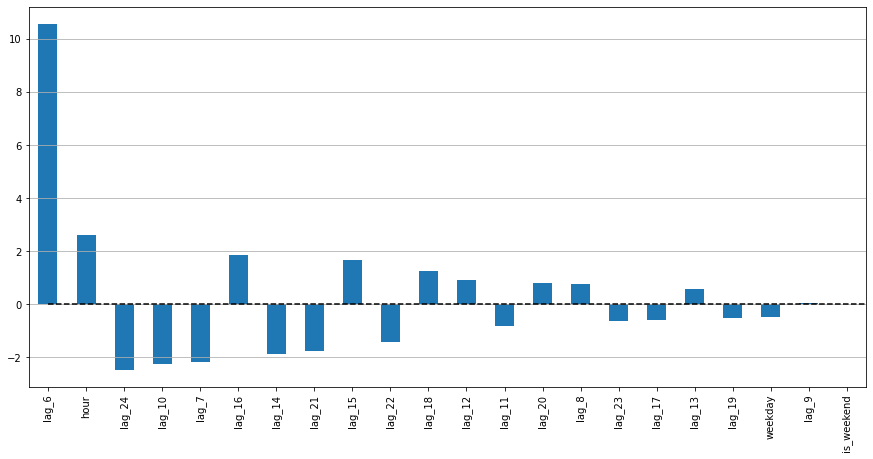

In [93]:
y = df.dropna().value
X = df.dropna().drop(['value'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

### Target encoding

In [94]:
def code_mean(df, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(df.groupby(cat_feature)[real_feature].mean())

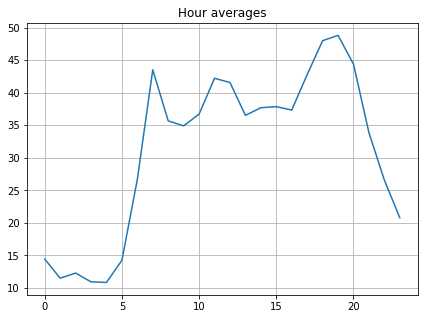

In [96]:
average_hour = code_mean(df, 'hour', "value")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);

In [97]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

In [100]:
X_train, X_test, y_train, y_test = prepareData(df.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

AttributeError: 'DataFrame' object has no attribute 'Ads'

In [ ]:
X_train, X_test, y_train, y_test =\
prepareData(ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regularization and feature selection

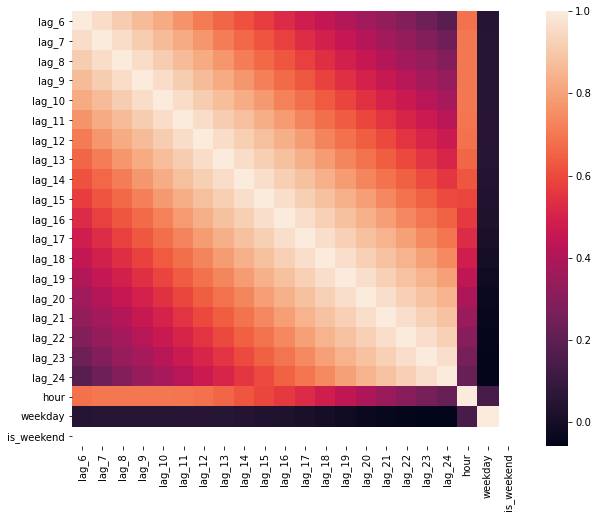

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

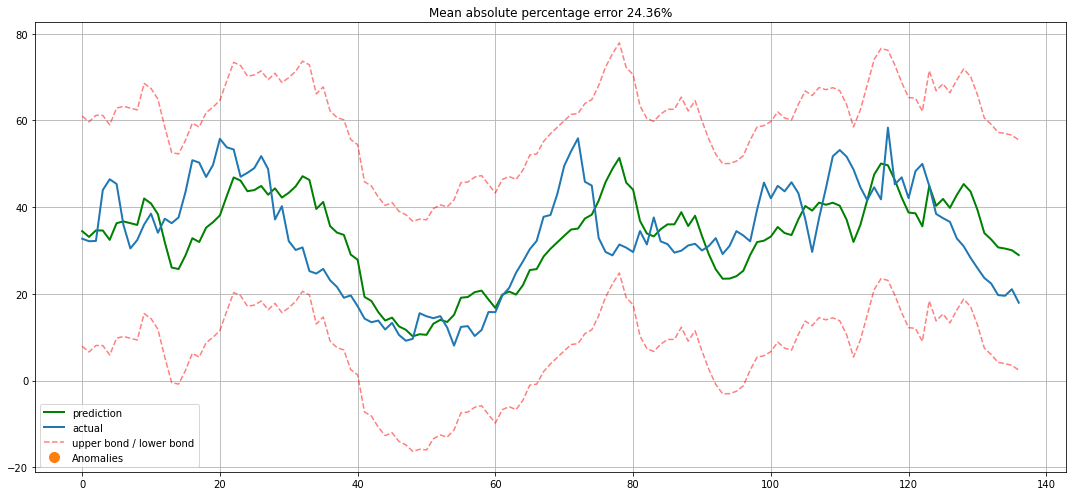

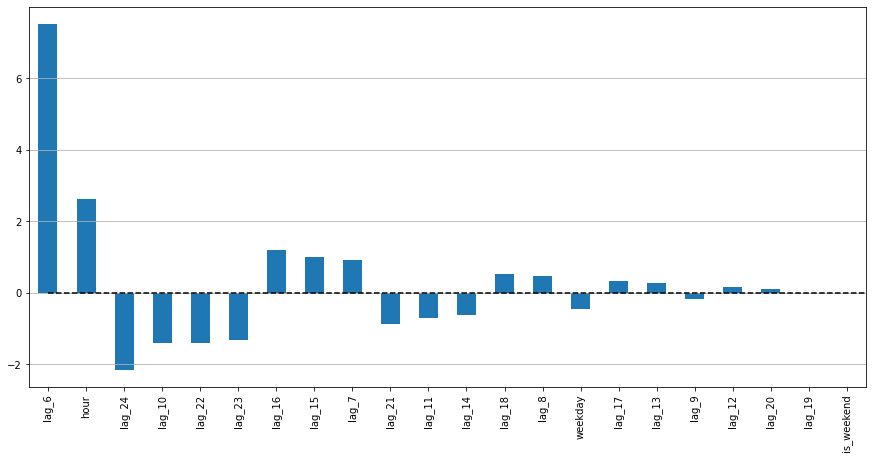

In [102]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

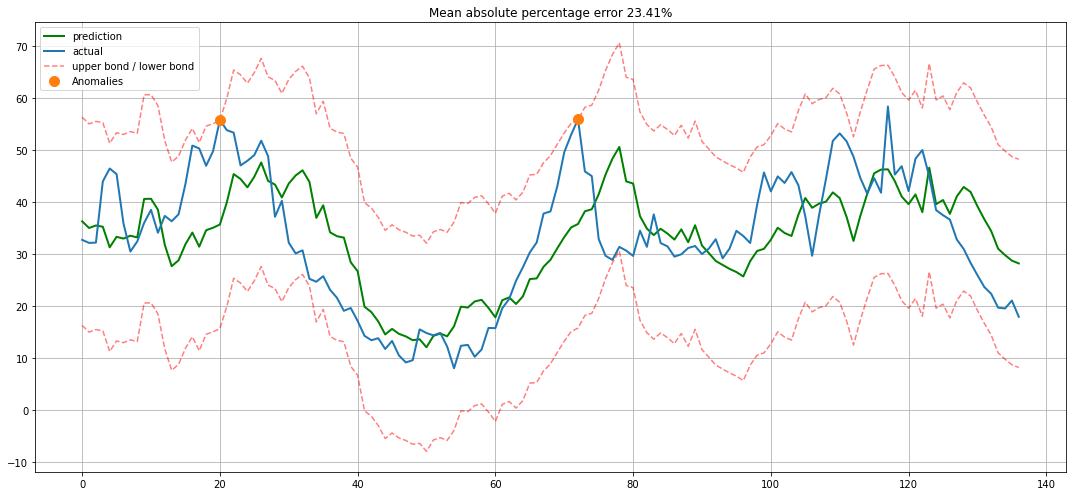

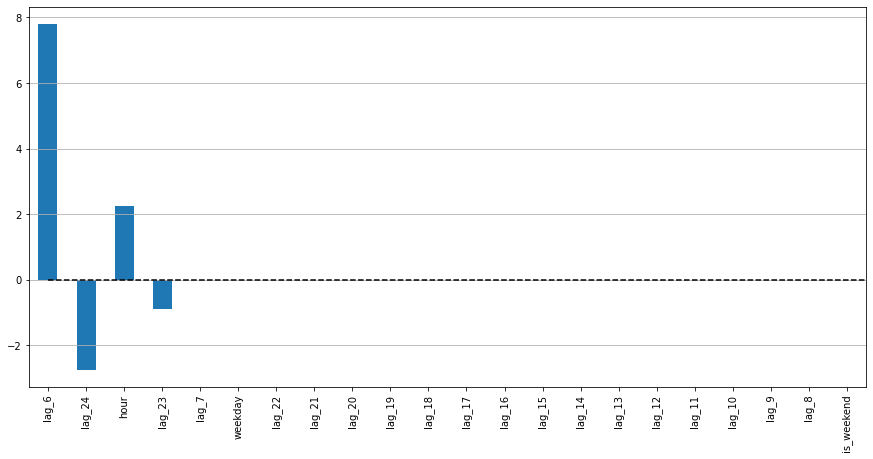

In [103]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

## Boosting OR XGBoost

In [108]:
import sys
print(sys.base_prefix)

C:\Users\Catarina\anaconda3


In [114]:
import sys
!{sys.executable} -m pip install xgboost

In [115]:
#import xgboost
#from xgboost.xgbclassifier import XGBClassifier

from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

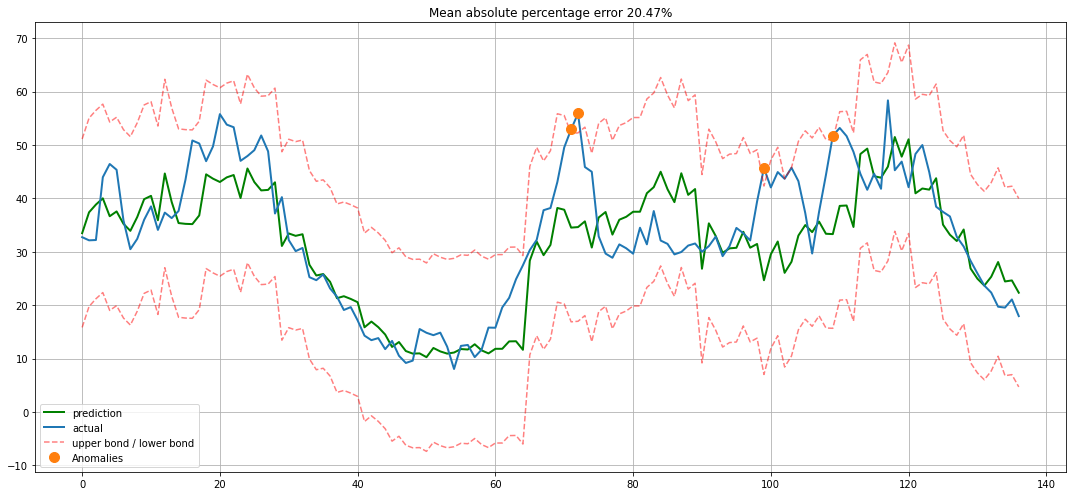

In [116]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)